In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
from PhD_Luminosity_function_final import *
from evfit import *
from simcat import *

In [2]:
hdul = fits.open('gkvScienceCatv02.fits')
data = hdul[1].data
t=Table(data)
df = t.to_pandas()

In [3]:
df = df[(df['NQ']>2) & (df['SC']>=7) & (df['mag']<19.72) & (df['RAcen']<300)]

In [4]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,flux_W2l,flux_err_W2t,duplicate,mask,starmask,uberclass,CATAID,SC,Z,NQ
28,128980003711188,129.579930,-1.029780,129.579933,-1.029784,129.579917,-1.029802,-3.252273e-13,3.965989e-12,-0.251301,...,0.000381,9.162291e-06,False,False,False,1,3600151,8,0.08185,4
39,128980004608892,129.579121,-1.246004,129.579142,-1.245971,129.579127,-1.245989,-6.235091e-13,4.453040e-12,-0.251301,...,0.000051,6.123744e-07,False,False,False,1,3874273,7,0.30551,4
46,128980005210530,129.578549,-1.091716,129.578537,-1.091739,129.578521,-1.091757,-1.983639e-13,4.022541e-12,-0.251301,...,0.000268,8.127045e-06,False,False,False,1,3600249,8,0.28994,4
48,128980005309861,129.578474,-1.154733,129.578459,-1.154730,129.578443,-1.154749,-1.950925e-13,4.120472e-12,-0.251301,...,0.000079,2.108944e-06,False,False,False,1,3600327,7,0.27092,4
79,128980008210800,129.575720,-1.066314,129.575705,-1.066317,129.575689,-1.066335,-4.437626e-13,4.039319e-12,-0.251301,...,0.000067,1.040680e-06,False,False,False,1,3600321,7,0.29026,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774035,224021222504535,223.031751,2.343636,223.031720,2.343569,223.031692,2.343541,-1.074581e-13,3.976355e-12,-0.210898,...,0.000074,1.793492e-06,False,False,False,1,263129,8,0.31855,4
1774051,224021225210755,223.028958,2.929282,223.028921,2.929247,223.028893,2.929219,-5.399757e-13,3.939633e-12,-0.210898,...,0.000149,1.444302e-06,False,False,False,1,3336094,7,0.48823,4
1774058,224021226105464,223.028218,2.431092,223.028290,2.431043,223.028262,2.431016,-6.621136e-15,4.026632e-12,-0.210898,...,0.000090,1.647582e-06,False,False,False,1,364114,8,0.19686,4
1774074,224021228202966,223.026430,2.195831,223.026413,2.195829,223.026385,2.195802,-5.616802e-13,4.213400e-12,-0.210898,...,0.000124,1.279430e-06,False,False,False,1,263115,7,0.31247,4


('lambda', 'pass')
('lambda', 'pass')
('lambda', 'pass')
('lambda', 'pass')
('lambda', 'pass')


C:\Users\adrie\anaconda3\lib\site-packages\kcorrect\template.py:221: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)


Fixed  0 missing fluxes
Replacing 38 bad fits with mean


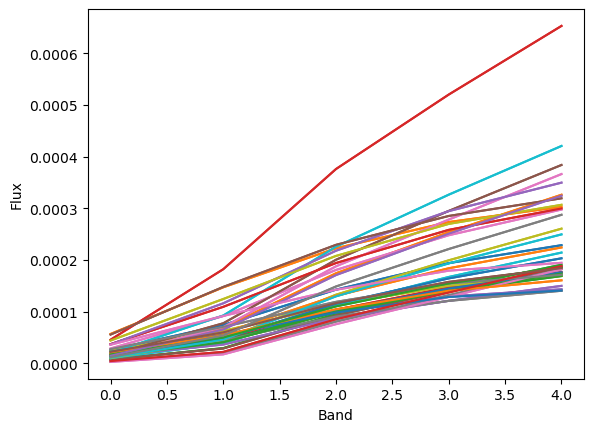

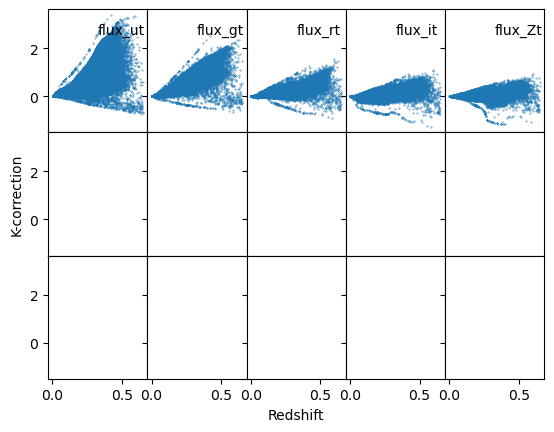

C:\Users\adrie\kcorr_final.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Kcorrection'] = k.tolist()
C:\Users\adrie\kcorr_final.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['r_Kcorrection'] = [x[index] for x in k]
C:\Users\adrie\kcorr_final.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

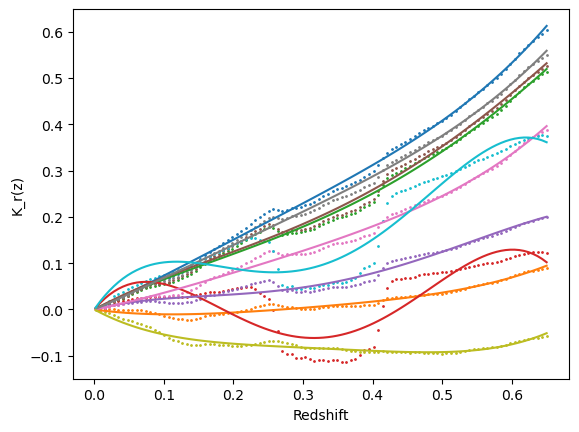

In [5]:
df = kcorrection(df, responses=['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z'], fnames=['flux_ut', 'flux_gt', 'flux_rt', 'flux_it', 'flux_Zt'], ferrnames=['flux_err_ut', 'flux_err_gt', 'flux_err_rt', 'flux_err_it', 'flux_err_Zt'], redshift='Z')

In [6]:
df = luminosity_distance(df, redshift='Z')

C:\Users\adrie\PhD_Luminosity_function_final.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Lum_Distance'] = Distance ( z=dataframe[redshift].values, cosmology = LambdaCDM(H0, Om0, Ode0) ).to(u.parsec).value


In [7]:
df = magnitude(df, bands=['u', 'g', 'r', 'i', 'Z'], fluxbands = ['flux_ut', 'flux_gt', 'flux_rt', 'flux_it', 'flux_Zt'])

C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\adrie\PhD_Luminosity_function_final.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'm_{bands[i]}'] = 8.9 - 2.5 * np.log10(dataframe[fluxbands[i]])
C:\Users\adrie\PhD_Luminosity_function_final.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'M_{bands[i]}'] = dataframe[f'm_{bands[i]}'] - 5 * np

In [8]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,m_u,M_u,m_g,M_g,m_r,M_r,m_i,M_i,m_Z,M_Z
0,128980003711188,129.579930,-1.029780,129.579933,-1.029784,129.579917,-1.029802,-3.252273e-13,3.965989e-12,-0.251301,...,20.159258,-17.256015,18.294933,-19.026887,17.328365,-19.873120,16.890331,-20.255718,16.590895,-20.547061
1,128980004608892,129.579121,-1.246004,129.579142,-1.245971,129.579127,-1.245989,-6.235091e-13,4.453040e-12,-0.251301,...,21.078495,-19.410843,20.408955,-20.254069,19.646542,-20.675937,19.380718,-20.898145,19.170029,-21.057486
2,128980005210530,129.578549,-1.091716,129.578537,-1.091739,129.578521,-1.091757,-1.983639e-13,4.022541e-12,-0.251301,...,21.847305,-19.570523,19.806389,-21.331292,18.341553,-22.141490,17.878273,-22.459510,17.517006,-22.744204
3,128980005309861,129.578474,-1.154733,129.578459,-1.154730,129.578443,-1.154749,-1.950925e-13,4.120472e-12,-0.251301,...,21.232170,-19.089028,20.294958,-20.119748,19.472290,-20.586200,19.180294,-20.724391,18.911640,-20.926813
4,128980008210800,129.575720,-1.066314,129.575705,-1.066317,129.575689,-1.066335,-4.437626e-13,4.039319e-12,-0.251301,...,21.139484,-19.329032,20.230236,-20.369163,19.402079,-20.847061,19.094368,-21.097508,18.845167,-21.291705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153954,224021222504535,223.031751,2.343636,223.031720,2.343569,223.031692,2.343541,-1.074581e-13,3.976355e-12,-0.210898,...,20.747770,-19.958616,19.986752,-20.911290,19.094301,-21.419094,18.742004,-21.709777,18.526962,-21.875010
153955,224021225210755,223.028958,2.929282,223.028921,2.929247,223.028893,2.929219,-5.399757e-13,3.939633e-12,-0.210898,...,22.741409,-20.006055,21.163631,-21.848277,19.570961,-22.713964,18.943310,-23.112026,18.468418,-23.478544
153956,224021226105464,223.028218,2.431092,223.028290,2.431043,223.028262,2.431016,-6.621136e-15,4.026632e-12,-0.210898,...,21.065182,-18.465537,19.910173,-19.679185,19.027145,-20.308349,18.630396,-20.594915,18.400307,-20.837490
153957,224021228202966,223.026430,2.195831,223.026413,2.195829,223.026385,2.195802,-5.616802e-13,4.213400e-12,-0.210898,...,22.982391,-18.583657,20.837799,-20.516408,19.429008,-21.257456,18.921093,-21.625961,18.578629,-21.863335


CosmoLookup: H0=100.0, Omega_l=0.7, P=1


C:\Users\adrie\anaconda3\lib\site-packages\kcorrect\template.py:221: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)


kmin, kmax = -0.8978496789932251 1.5592775344848633
Simulating 166729 galaxies
164428
162152
159925
157760
155572
153430
151135
148985
146819
144493
142331
139972
137619
135410
133177
130975
128656
126416
124157
122002
119736
117581
115365
113061
110887
108671
106414
104268
102110
99882
97611
95404
93204
90892
88643
86445
84148
81945
79734
77526
75307
73129
70915
68677
66392
64115
61898
59640
57379
55124
52856
50662
48440
46185
43881
41640
39483
37254
35036
32739
30460
28216
26067
23808
21643
19327
17160
14938
12781
10531
8211
6044
3872
1698
0
iz  delta  zhist  nsel
0 1.2800908900982457 165 376
1 -0.8420594861291054 534 84
2 -0.9068529073559256 1044 97
3 -0.05193113563212872 1515 1436
4 1.0260538734107962 1998 4048
5 0.5146771103267964 2566 3887
6 0.004664348783751644 2921 2935
7 -1.7620692004008927 3286 -2504
8 0.5897126097999098 3683 5855
9 -0.6655138314594214 4065 1360
10 0.30340733942114045 4391 5723
11 0.0652671900479364 4717 5025
12 0.19745232390606188 4988 5973
13 0.535383933766

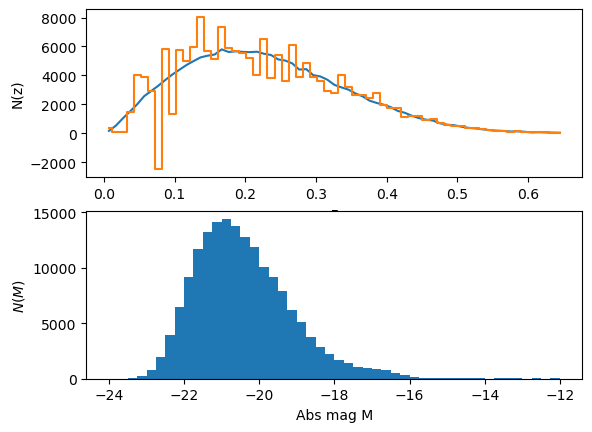

In [9]:
dfsim = dfsim = simcat(df, mrange=(10, 19.72), survey='GAMAIII', area=180, kc_responses=['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z'])

In [10]:
dfsim

,m_r,FIBERMAG_R,R_SB,Z,NQ,SC,vis_class,post_class,RAcen,r_Kcorrection,pcoeffs,coeffs,A_r
0,19.555566,20.214252,22.875907,0.010329,4.0,7.0,0.0,0.0,219.880596,0.014149,"[-0.0, 0.634390707748662, 2.9984108082344303, ...","[0.014515829272568226, 0.0, 0.0, 0.01611103676...",0.0
1,17.108796,18.723125,23.017028,0.011131,0.0,7.0,0.0,0.0,137.999827,0.006296,"[-0.0, 1.3977225451718278, -8.013467490603508,...","[0.013077085837721825, 0.0, 0.0018309799488633...",0.0
2,14.893895,16.180278,21.399987,0.008021,4.0,7.0,0.0,0.0,139.748469,0.006533,"[-0.0, 1.381452968460217, -5.889118429420727, ...","[0.010841766372323036, 1.3842055750501459e-06,...",0.0
3,16.734047,19.171295,23.264656,0.008470,4.0,7.0,0.0,0.0,135.599176,-0.004179,"[-0.0, -0.3119858190644416, -5.669850880548332...","[0.0, 0.0, 0.0008697814191691577, 0.0, 0.00105...",0.0
4,18.514740,19.988169,22.864831,0.009248,4.0,7.0,0.0,0.0,130.943604,0.010014,"[-0.0, 0.5635650890691161, 1.6082745451354437,...","[0.02406444028019905, 0.0, 0.00077560497447848...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169858,19.507545,21.036171,21.481868,0.645188,4.0,7.0,0.0,0.0,215.680833,0.735151,"[-0.0, 0.4242882703659638, -0.0434858683189067...","[0.006886855699121952, 0.0, 0.0003561801568139...",0.0
169859,19.352376,20.450531,20.615791,0.645154,4.0,7.0,0.0,0.0,135.686588,-0.947000,"[-0.0, 3.635685227833503, -56.79499946395583, ...","[0.0, 5.765257160561532e-10, 0.0, 0.0, 0.0]",0.0
169860,19.352376,20.352588,22.587153,0.645154,4.0,7.0,0.0,0.0,135.686588,-0.947000,"[-0.0, 3.635685227833503, -56.79499946395583, ...","[0.0, 5.765257160561532e-10, 0.0, 0.0, 0.0]",0.0
169861,19.718600,20.441701,23.055788,0.649784,4.0,7.0,0.0,0.0,214.423796,0.438102,"[-0.0, 0.7556572836409137, -9.633187627911429,...","[0.03794042021036148, 0.0, 0.01859471388161182...",0.0


In [11]:
dfsim.to_pickle('dataframe_GAMAIII_ugriZ_sim.pkl')

In [12]:
df_sample = sample(dfsim, 30000)

In [13]:
# import pandas as pd
# dfsim = pd.read_pickle('dataframe_GAMAIII_ugriZ_sim.pkl')
# from evfit import *

C:\Users\adrie\anaconda3\lib\site-packages\kcorrect\template.py:221: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)



************************
jswml.py version  1.1
survey :  GAMAIII
mlims :  (0, 19.72)
redshift range : [ 0.002 ;  0.65 ]
area :  180
method :  post
Kcorrect responses :  ['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z']
{}
CosmoLookup: H0=100.0, Omega_l=0.7, P=1
H0, omega_l, z0, area/Sr =  100.0 0.7 0 0.05483113556160754
27830 galaxies selected
Setting LF bin limits Qmin, Qmax =  0.0 1.5
LF bins at Qmin:  [   0    1    9   38  148  333  631 1054 1478 1845 2202 2318 2493 2251
 2061 1931 1623 1514 1295 1016  808  622  463  355  255  249  182  157
  138  136   76   61   22   12    7    5    8    2    2    3]
LF bins at Qmax:  [   0    0    0    0    1   10   80  217  551 1086 1676 2274 2604 2852
 2739 2448 2130 1834 1657 1269 1061  794  610  438  319  252  200  181
  145  154   91   62   26   15    8    5    7    3    2    2]
[False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  T

  0%|          | 0/30 [00:00<?, ?it/s]

C:\Users\adrie\evfit.py:1076: RuntimeWarning: invalid value encountered in divide
  err = phi/hist**0.5


Simplex optimization ...
Optimization terminated successfully.
         Current function value: 3748.578417
         Iterations: 32
         Function evaluations: 64


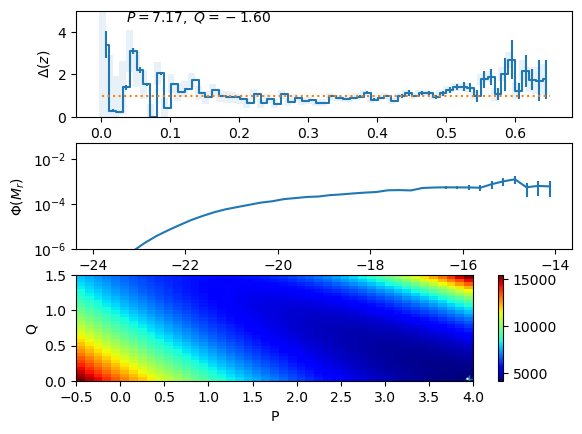

In [14]:
ev_fit(infile=df_sample, outfile='evfit_post_GAMAIII_sim.fits', mlims=(0, 19.72), param='m_r', Mmin=-24, Mmax=-14, Mbin=40, method='post', survey='GAMAIII', area=180, kc_responses=['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z'])


************************
jswml.py version  1.1
survey :  GAMAIII
mlims :  (0, 19.72)
redshift range : [ 0.002 ;  0.65 ]
area :  180
method :  lfchi
Kcorrect responses :  ['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z']
{}
CosmoLookup: H0=100.0, Omega_l=0.7, P=1
H0, omega_l, z0, area/Sr =  100.0 0.7 0 0.05483113556160754
27830 galaxies selected
Setting LF bin limits Qmin, Qmax =  0.0 1.5
zlo, zhi, Mmin, Mmax, nbins
0.002 0.2013846153846154 -39.39375457853297 -9.173518933852847 28
LF bins at Qmin:  [   0    0    0    1    2    8   18   50   89  170  293  384  622  745
  926 1171 1307 1449 1294 1016  808  622  463  355  255  249  182  157
  138  136   76   61   22   12    7    5    8    2    2    3]
0.2013846153846154 0.65 -43.14926523956882 -19.67375457853297 14
LF bins at Qmin:  [   0    1    9   37  146  325  613 1004 1389 1675 1909 1934 1871 1506
 1135  760  316   65    1    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
0.002 0

  0%|          | 0/30 [00:00<?, ?it/s]

Simplex optimization ...
Optimization terminated successfully.
         Current function value: 3870.745718
         Iterations: 36
         Function evaluations: 71


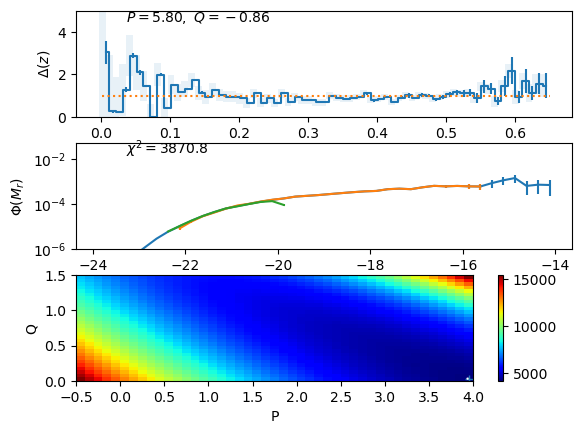

In [15]:
ev_fit(infile=df_sample, outfile='evfit_lfchi_GAMAIII_sim.fits', mlims=(0, 19.72), param='m_r', Mmin=-24, Mmax=-14, Mbin=40, method='lfchi', survey='GAMAIII', area=180, kc_responses=['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z'])